# Start of PCA

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronReading_38.csv')




In [3]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.009665
2,44784,6,value_scantronReading,False,0.947277,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.934354
3,44807,7,value_scantronReading,True,1.014669,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.028650
4,44809,7,value_scantronReading,False,0.934665,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.949085


In [4]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [5]:
#
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'is_proficient'])

In [6]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronReading'].drop(columns=['dataSource'])


In [9]:
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print DataFrame info to see all columns and their data types
print(one_hot_encoded_df2.info())

# Print the count of null values per column
print(one_hot_encoded_df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Columns: 139 entries, level to past_proficient_score
dtypes: bool(133), float64(2), int64(4)
memory usage: 3.5 MB
None
level                        0
proficient_score             0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5280
Length: 139, dtype: int64


In [10]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

# Print the columns that have null values
print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [11]:
one_hot_encoded_df2.shape

(20460, 139)

In [12]:
one_hot_encoded_df2['past_proficient_score']

0        0.969279
1        1.009665
2        0.934354
3        1.028650
4        0.949085
           ...   
20455         NaN
20456         NaN
20457         NaN
20458         NaN
20459    0.870724
Name: past_proficient_score, Length: 20460, dtype: float64

In [13]:
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [14]:
one_hot_encoded_df2.shape

(15180, 139)

## PCA

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `encoded_final_df` is your current DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [16]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8010141117731087


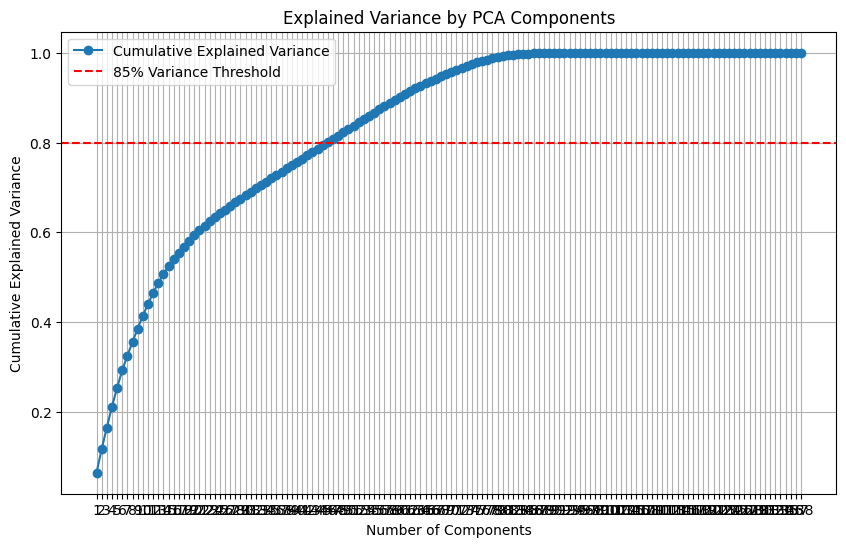

Number of components needed: 46


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [18]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [19]:
first_46_pcs_df = X_pca_df.iloc[:, :46].copy()

In [20]:
first_46_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
0,-4.413662,-3.371036,0.631070,0.189679,17.975992,12.240829,-12.251438,0.684298,4.023727,12.495395,1.530216,2.314058,-4.669215,-12.380585,7.604633,-2.500150,-1.044729,0.260789,0.389427,-1.781099,-2.366148,-0.462402,0.085027,-0.518713,-2.444218,1.981118,-4.002206,0.159393,1.426280,-0.640398,0.956218,1.389018,-2.440111,-0.683176,-0.169545,0.464145,0.618300,0.016341,0.107877,-0.015779,-0.006187,1.774022e-02,0.004527,-0.008379,0.048573,-0.034576
1,-3.149145,-3.272884,0.493852,0.153124,12.413644,7.174544,-6.326654,0.155909,2.072803,5.806828,0.765727,1.341605,-3.373457,-4.451882,2.107381,-0.435064,-0.362350,0.080913,-0.184790,-0.575180,0.677503,-0.019811,-0.028482,0.141986,1.213324,0.714550,0.354637,-0.005021,-0.272563,0.353965,-0.436290,-0.036926,0.464585,-0.206879,0.124157,0.044226,0.045879,-0.002413,-0.019079,0.008925,0.001864,-4.616361e-03,-0.009424,-0.000557,-0.015393,0.004574
2,-3.149739,-3.896399,0.576627,-0.081387,16.111867,-9.606662,-4.651917,-0.183306,-3.684891,4.199903,-0.183293,1.415111,1.444999,13.962593,0.886138,0.979386,-2.590553,0.549593,2.964856,3.115593,-0.652651,0.662122,0.015161,0.072314,1.085675,0.923607,0.852288,2.593599,1.455804,2.053386,-0.874527,-0.713052,0.847844,2.188937,-0.632577,-0.638419,0.153013,0.052960,0.011147,-0.032782,0.015367,6.206443e-03,0.013735,0.026058,-0.005961,-0.011558
3,-3.287624,-3.439358,0.562677,0.159315,14.039770,7.390462,-8.527047,0.431338,2.486966,8.560338,0.988685,2.034590,-4.473241,-7.768237,6.270327,-2.028471,-1.453719,0.061561,-0.435547,-3.445009,-0.012388,-0.510424,-0.057262,0.017607,0.255652,-0.756897,0.865080,-1.193274,-0.875297,-1.042417,0.443575,-0.167202,-0.087882,-0.369118,0.140862,0.032152,-0.306188,-0.021860,-0.013478,0.006425,-0.006000,-2.061511e-03,0.004853,-0.005676,0.005791,0.009531
4,-3.735432,-3.922806,0.643175,0.213069,16.225312,12.200815,-10.831599,0.429609,4.061841,11.053388,1.374951,2.705626,-6.674062,-12.526965,7.626707,-2.398763,-2.552976,0.380585,0.691655,-2.974341,-1.382288,-0.569856,-0.051839,0.038504,0.664044,-0.348539,1.281739,-0.160697,-1.215563,-0.406038,-0.060742,-0.372366,0.369625,-0.245198,0.139672,0.020126,-0.103310,-0.007307,-0.013368,0.005865,-0.003145,-4.035238e-03,0.004022,-0.000149,-0.004858,0.005459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15175,-0.573582,-0.788533,-0.004429,0.060111,-0.961750,-0.086735,-0.373584,-0.017900,-0.012113,0.116184,-0.012893,0.022657,0.029838,0.010161,0.080555,0.008042,-0.070920,-0.412775,-0.043012,0.002593,-0.031299,0.055511,0.001047,0.018014,-0.083797,0.024067,-0.037848,0.115276,-0.087954,0.030918,0.013190,-0.006479,0.003979,0.057558,-0.022941,-0.028225,-0.011937,-0.003169,-0.001093,0.002136,0.001096,2.242006e-04,-0.003845,0.001674,0.000458,0.003284
15176,-0.555705,-0.789482,-0.006309,0.079637,-0.933664,-0.060894,-0.346359,0.074178,-0.015667,0.111904,-0.003149,-0.000232,0.033068,0.006971,0.126556,0.055019,-0.201107,-0.543920,0.031556,0.004995,0.086474,0.174334,-0.005654,-0.117915,0.206828,-0.111591,0.140988,-0.268856,0.536710,0.088671,-0.089230,-0.016266,0.063490,0.026086,0.010359,0.028111,0.105721,-0.000407,-0.002549,0.008736,0.002484,-1.543075e-03,-0.012579,0.000737,-0.009732,0.001126
15177,-0.068339,-0.894123,-0.001685,-0.055481,-0.969335,-0.224397,-0.426516,0.067099,-0.004085,0.180371,0.005411,-0.001186,0.031529,-0.002168,0.075756,0.040368,-0.129085,-0.528309,0.026420,0.037510,0.082212,0.067320,-0.000710,-0.037171,0.167005,-0.060666,0.091320,-0.217338,0.317113,0.010153,-0.052784,0.001042,0.014578,-0.041348,0.024565,0.039850,0.055984,0.004926,0.001291,-0.000834,-0.000373,-6.509914e-04,0.001077,-0.001549,-0.003555,-0.004200
15178,-0.074923,-0.893773

In [21]:

# Get the PCA components (loadings)
components = pca.components_[:46]  

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HOMEROOM', 'course_MATH 3', 'course_LANGUAGE 3', 'course_SOC ST 3', 'course_SCIENCE 3']
Top features for PC2: ['course_CivicsGr 7', 'course_Geog Gr7', 'course_English Gr 7', 'course_Math 7', 'course_LifeSci Gr7']
Top features for PC3: ['course_English Gr 8', 'course_PhySci Gr 8', 'course_WLDHIS 1500', 'course_CareerPrepA5', 'course_Math8 PreAlg']
Top features for PC4: ['course_READING 4', 'course_SCIENCE 4', 'course_LANGUAGE 4', 'course_SOC ST 4', 'course_MATH 4']
Top features for PC5: ['course_EnrichmtP6', 'school_Middle School A', 'course_English LA 5', 'course_Science Gr 5', 'course_SocialStuGr5']
Top features for PC6: ['course_MATH 6', 'course_English LA 6', 'course_PE 6', 'course_Science Gr 6', 'course_English LA 5']
Top features for PC7: ['school_Middle School D', 'course_ELAGrPK6H/Ad', 'course_SoSt6H/A', 'course_Math6H/Adv', 'course_SciGr6H/A']
Top features for PC8: ['course_CivicH/Adv 7', 'course_GeogH/AdvGr7', 'course_LifeSciH Gr7', 'course_Eng 7

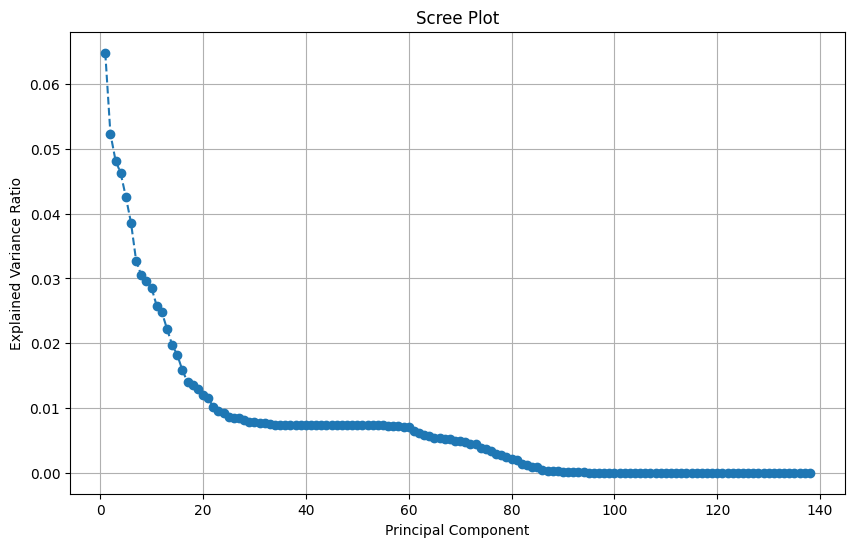

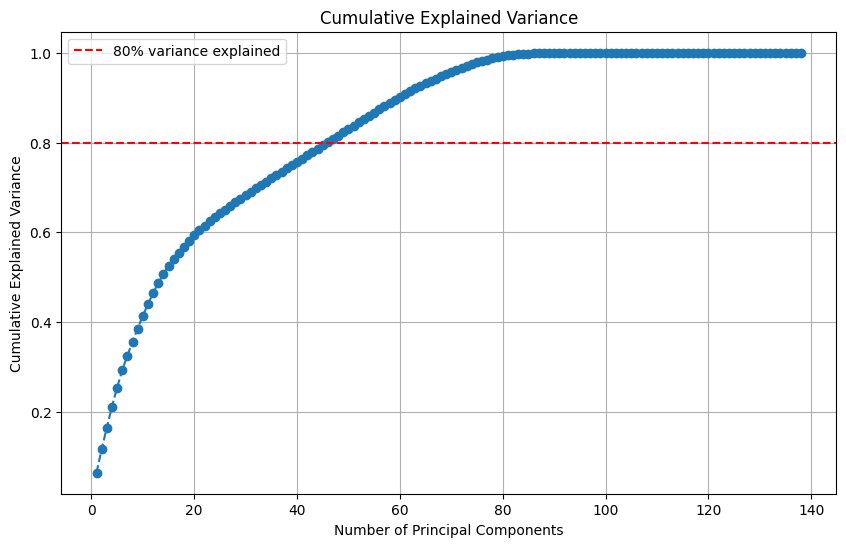

In [22]:


# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

In [30]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [31]:
X = first_46_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [32]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBoost and catboost

Cross-Validated MSE (XGBoost): 0.00
[0]	train-rmse:0.10247	eval-rmse:0.10711
[1]	train-rmse:0.09657	eval-rmse:0.10162
[2]	train-rmse:0.09140	eval-rmse:0.09680
[3]	train-rmse:0.08702	eval-rmse:0.09275
[4]	train-rmse:0.08311	eval-rmse:0.08916
[5]	train-rmse:0.07973	eval-rmse:0.08619
[6]	train-rmse:0.07666	eval-rmse:0.08375
[7]	train-rmse:0.07412	eval-rmse:0.08163
[8]	train-rmse:0.07180	eval-rmse:0.07986
[9]	train-rmse:0.06988	eval-rmse:0.07829
[10]	train-rmse:0.06820	eval-rmse:0.07695
[11]	train-rmse:0.06672	eval-rmse:0.07601
[12]	train-rmse:0.06536	eval-rmse:0.07517
[13]	train-rmse:0.06424	eval-rmse:0.07431
[14]	train-rmse:0.06330	eval-rmse:0.07372
[15]	train-rmse:0.06245	eval-rmse:0.07318
[16]	train-rmse:0.06170	eval-rmse:0.07265
[17]	train-rmse:0.06108	eval-rmse:0.07224
[18]	train-rmse:0.06046	eval-rmse:0.07195
[19]	train-rmse:0.05995	eval-rmse:0.07165
[20]	train-rmse:0.05944	eval-rmse:0.07140
[21]	train-rmse:0.05902	eval-rmse:0.07114
[22]	train-rmse:0.05866	eval-rmse:0.07099
[23]	tra

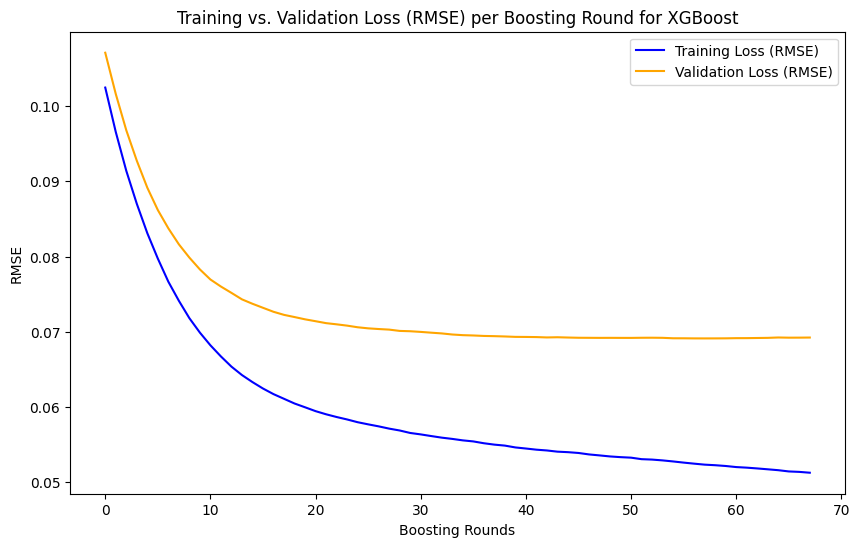

XGBoost - MSE: 0.00, R²: 0.63, RMSE: 0.07


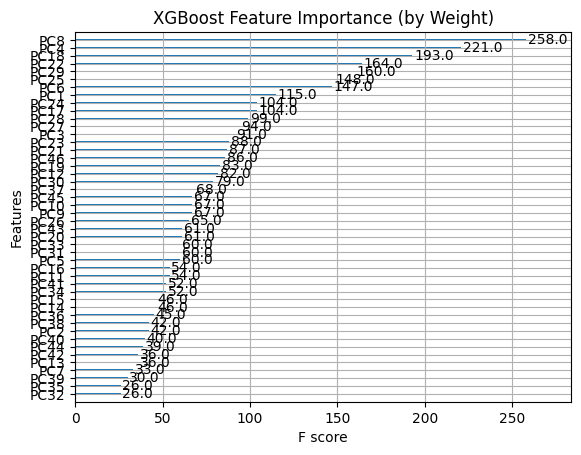

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1038449	test: 0.1081195	best: 0.1081195 (0)	total: 142ms	remaining: 1m 10s
50:	learn: 0.0635234	test: 0.0710542	best: 0.0710542 (50)	total: 590ms	remaining: 5.2s
100:	learn: 0.0605092	test: 0.0694239	best: 0.0694239 (100)	total: 958ms	remaining: 3.79s
150:	learn: 0.0583314	test: 0.0690078	best: 0.0690070 (145)	total: 1.36s	remaining: 3.14s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.06900703156
bestIteration = 145

Shrink model to first 146 iterations.
CatBoost - MSE: 0.00, R²: 0.63, RMSE: 0.07


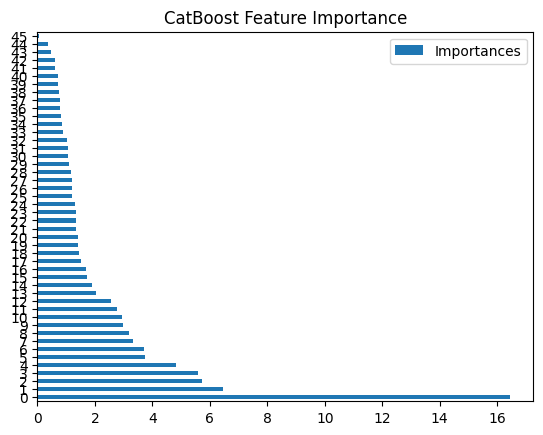

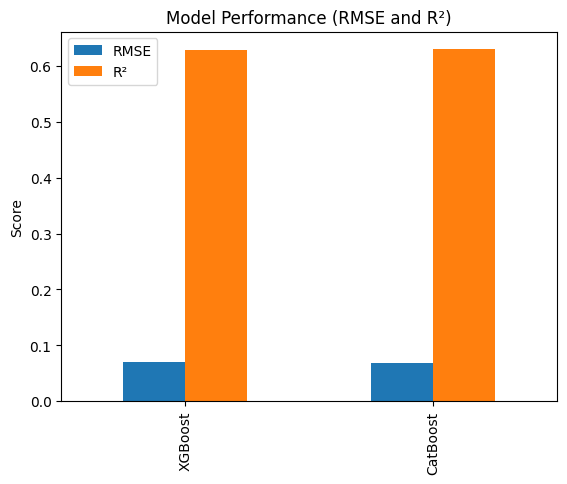

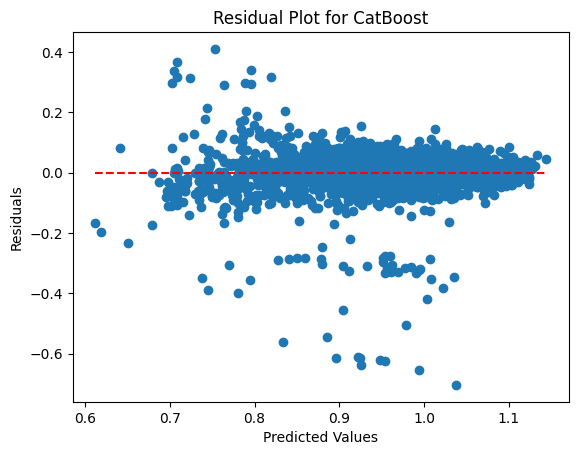

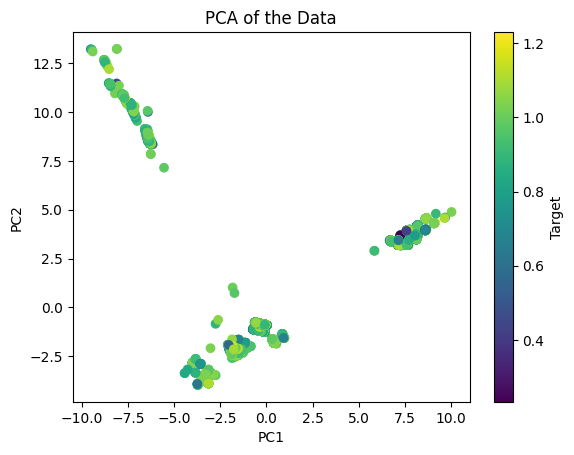

PermutationExplainer explainer:  61%|████████████████████████████▏                 | 1858/3036 [04:41<03:02,  6.45it/s]


KeyboardInterrupt: 

In [27]:
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- XGBoost Code ---

# Initialize XGBRegressor with regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE (XGBoost): {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost training
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Evaluate both train and validation losses during training
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract losses from evals_result
train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()

# Make predictions and evaluate performance
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Feature importance plot for XGBoost
plot_importance(xgb_model_trained, importance_type='weight', title='XGBoost Feature Importance (by Weight)')
plt.show()

# --- CatBoost Code ---

# Identify categorical features and prepare data pools
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Initialize and train CatBoost with early stopping
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    eval_metric='RMSE',
    cat_features=categorical_features_indices
)

# Fit the model with early stopping and log evaluation metrics
catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Make predictions and evaluate performance
catboost_y_pred = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
catboost_rmse = np.sqrt(catboost_mse)

print(f"CatBoost - MSE: {catboost_mse:.2f}, R²: {catboost_r2:.2f}, RMSE: {catboost_rmse:.2f}")

# Feature importance plot for CatBoost
feature_importance = pd.DataFrame(catboost_model.get_feature_importance(prettified=True))
feature_importance.plot(kind='barh', title='CatBoost Feature Importance')
plt.show()

# --- Additional Metrics Plot ---

# Compile and plot model performance metrics
metrics = {'RMSE': [xgb_rmse, catboost_rmse], 'R²': [xgb_r2, catboost_r2]}
df_metrics = pd.DataFrame(metrics, index=['XGBoost', 'CatBoost'])

df_metrics.plot(kind='bar', title="Model Performance (RMSE and R²)")
plt.ylabel("Score")
plt.show()

# --- Residual Plot ---

# Calculate residuals and plot residuals vs predictions
residuals = y_test - catboost_y_pred
plt.scatter(catboost_y_pred, residuals)
plt.hlines(y=0, xmin=min(catboost_y_pred), xmax=max(catboost_y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for CatBoost')
plt.show()

# --- PCA Analysis (optional) ---

# PCA plot to visualize data clusters based on target
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)  # Replace X with your data
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y, cmap='viridis')  # Replace y with your labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Data')
plt.colorbar(label='Target')
plt.show()

# --- SHAP Analysis for Feature Interpretability ---

# --- SHAP Analysis for PCA-based XGBoost ---

import shap
import xgboost as xgb

# Define custom prediction function for PCA-based XGBoost model
# Define custom prediction function for PCA-based XGBoost model
def predict_with_pca(data):
    """
    Custom prediction function to pass PCA-transformed data
    through the trained XGBoost model.
    """
    # Convert the data to DMatrix before prediction
    dmatrix_data = DMatrix(data)
    return xgb_model_trained.predict(dmatrix_data)  # Use the trained model on the DMatrix object

# Initialize SHAP explainer with the custom prediction function
explainer_pca = shap.Explainer(predict_with_pca, X_test)  # Use X_test directly instead of DMatrix

# Calculate SHAP values for the test set (PCA components)
shap_values_pca = explainer_pca(X_test)

# SHAP summary plot for PCA components (bar chart for overall impact)
shap.summary_plot(shap_values_pca, X_test, plot_type="bar")

# Optional: SHAP summary plot (beeswarm plot for individual impacts)
shap.summary_plot(shap_values_pca, X_test)






## SHAP exploration (has error)

 99%|===================| 12031/12144 [01:31<00:00]        

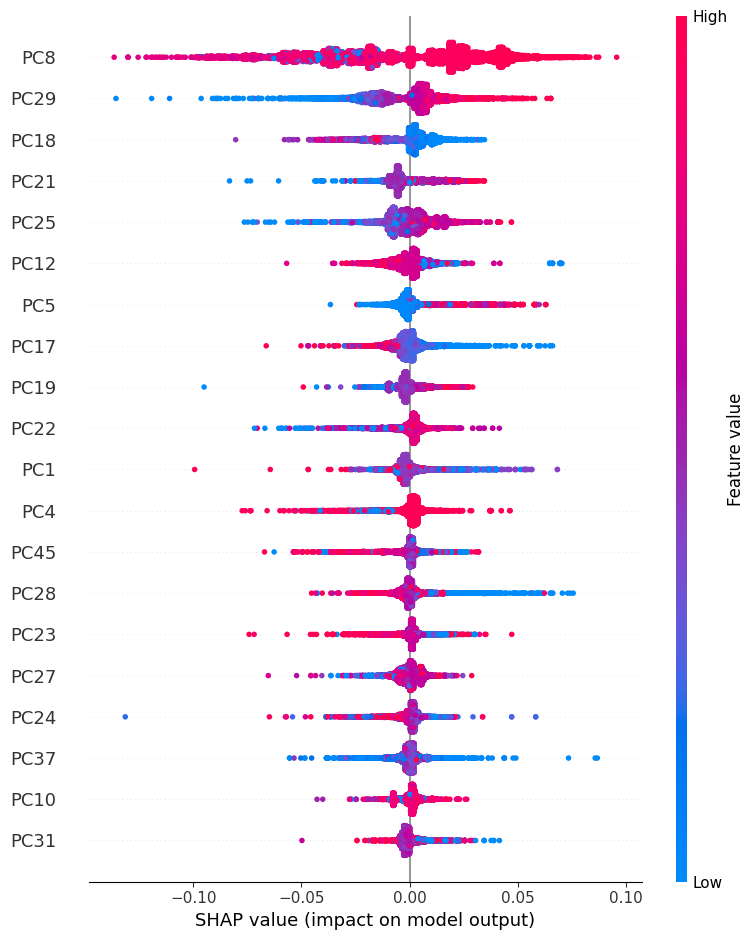

TypeError: '<' not supported between instances of 'Explanation' and 'float'

In [33]:
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import shap
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Preparation and Baseline Model ---
# Train baseline XGBoost model and compute SHAP values
xgb_baseline = XGBRegressor(random_state=42)
xgb_baseline.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(xgb_baseline, X_train)
shap_values = explainer(X_train)

# Plot summary of SHAP feature importance
shap.summary_plot(shap_values, X_train)

# Drop low-importance features (error)
low_importance_features = X_train.columns[shap_values.abs.mean(0) < 0.01]
X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

# --- Polynomial Features for Nonlinear Relationships ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_filtered)
X_test_poly = poly.transform(X_test_filtered)

# --- Hyperparameter Tuning with Optuna ---
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = XGBRegressor(**params, random_state=42)
    cv_scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring='r2')
    return cv_scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters from Optuna
best_params = study.best_params
best_params['gamma'] = 0.1  # Example for tree pruning

# --- Train Optimized XGBoost Model ---
xgb_model_optimized = XGBRegressor(**best_params, random_state=42)
xgb_model_optimized.fit(X_train_filtered, y_train)

# Evaluate optimized model
y_pred = xgb_model_optimized.predict(X_test_filtered)
optimized_r2 = r2_score(y_test, y_pred)
print(f"Optimized R^2: {optimized_r2:.4f}")

# --- Advanced Validation Strategies ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model_optimized, X_train_filtered, y_train, cv=kf, scoring='r2')
print(f"Cross-validated R^2: {cv_scores.mean():.4f}")

# --- Stacking for Ensemble Learning ---
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_optimized),
        ('catboost', CatBoostRegressor(verbose=0, random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train_filtered, y_train)
stacked_r2 = r2_score(y_test, stack_model.predict(X_test_filtered))
print(f"Stacked Model R^2: {stacked_r2:.4f}")

# --- Loss Visualization ---
# Plot training vs. validation loss from original XGBoost training
dtrain = DMatrix(X_train_filtered, label=y_train)
dtest = DMatrix(X_test_filtered, label=y_test)

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
train(params, dtrain, num_boost_round=100, evals=evals, evals_result=evals_result, early_stopping_rounds=10)

train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()


In [34]:
import pandas as pd
import numpy as np

# Step 1: Extract loadings matrix from PCA
loading_matrix = pca.components_  # Shape: (num_PCs, num_features)

# Step 2: Extract SHAP values for the PCs
shap_values_PCs = np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP values for PCs

# Step 3: Multiply SHAP values of PCs by the loadings to get original feature impacts
feature_impact = np.dot(shap_values_PCs, np.abs(loading_matrix.T))  # Shape: (num_features,)

# Step 4: Rank features by impact
features = X_train.columns  # Original feature names
feature_importance = pd.DataFrame({'Feature': features, 'Impact': feature_impact})
feature_importance = feature_importance.sort_values(by='Impact', ascending=False)

# Display the most impactful features
print(feature_importance.head(10))


ValueError: shapes (46,) and (138,138) not aligned: 46 (dim 0) != 138 (dim 0)

In [ ]:
print(f"Number of original features: {len(features)}")
print(f"Length of feature impact array: {len(feature_impact)}")


In [ ]:
# Ensure that we use the correct number of PCs (columns in loading matrix)
num_features = X_train.shape[1]  # Number of original features
num_PCs = pca.n_components_      # Number of principal components

# Confirm shapes
print(f"Loading matrix shape: {loading_matrix.shape}")
print(f"SHAP values shape: {shap_values.values.shape}")

# Feature impact calculation
if loading_matrix.shape[0] == shap_values.values.shape[1]:
    feature_impact = np.dot(np.abs(shap_values.values.mean(axis=0)), np.abs(loading_matrix.T))
else:
    raise ValueError("Mismatch between number of PCs in SHAP and PCA loadings.")


## hyperparameter tuning with optuna (need to use binary label)

In [38]:
'''
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import shap
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Preparation and Baseline Model ---
# Train baseline XGBoost model and compute SHAP values
xgb_baseline = XGBRegressor(random_state=42)
xgb_baseline.fit(X_train, y_train)


# Drop low-importance features
low_importance_features = X_train.columns[shap_values.abs.mean(0) < 0.01]
X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)


# --- Polynomial Features for Nonlinear Relationships ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# --- Hyperparameter Tuning with Optuna ---
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = XGBRegressor(**params, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    return cv_scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters from Optuna
best_params = study.best_params
best_params['gamma'] = 0.1  # Example for tree pruning

# --- Train Optimized XGBoost Model ---
xgb_model_optimized = XGBRegressor(**best_params, random_state=42)
xgb_model_optimized.fit(X_train, y_train)

# Evaluate optimized model
y_pred = xgb_model_optimized.predict(X_test)
optimized_r2 = r2_score(y_test, y_pred)
print(f"Optimized R^2: {optimized_r2:.4f}")

# --- Advanced Validation Strategies ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model_optimized, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-validated R^2: {cv_scores.mean():.4f}")

# --- Stacking for Ensemble Learning ---
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_optimized),
        ('catboost', CatBoostRegressor(verbose=0, random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train_filtered, y_train)
stacked_r2 = r2_score(y_test, stack_model.predict(X_test_filtered))
print(f"Stacked Model R^2: {stacked_r2:.4f}")

# --- Loss Visualization ---
# Plot training vs. validation loss from original XGBoost training
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
train(params, dtrain, num_boost_round=100, evals=evals, evals_result=evals_result, early_stopping_rounds=10)

train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()
'''

'\n# Import required libraries\nfrom xgboost import XGBRegressor, DMatrix, train, plot_importance\nfrom catboost import CatBoostRegressor, Pool\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.model_selection import cross_val_score, StratifiedKFold\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.ensemble import StackingRegressor\nfrom sklearn.linear_model import LinearRegression\nimport shap\nimport optuna\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# --- Data Preparation and Baseline Model ---\n# Train baseline XGBoost model and compute SHAP values\nxgb_baseline = XGBRegressor(random_state=42)\nxgb_baseline.fit(X_train, y_train)\n\n\n# Drop low-importance features\nlow_importance_features = X_train.columns[shap_values.abs.mean(0) < 0.01]\nX_train_filtered = X_train.drop(columns=low_importance_features)\nX_test_filtered = X_test.drop(columns=low_importance_features)\n\n\n#

In [40]:
'''
# --- Advanced Validation Strategies ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model_optimized, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-validated R^2: {cv_scores.mean():.4f}")

# --- Stacking for Ensemble Learning ---
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_optimized),
        ('catboost', CatBoostRegressor(verbose=0, random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train, y_train)
stacked_r2 = r2_score(y_test, stack_model.predict(X_test))
print(f"Stacked Model R^2: {stacked_r2:.4f}")

# --- Loss Visualization ---
# Plot training vs. validation loss from original XGBoost training
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
train(params, dtrain, num_boost_round=100, evals=evals, evals_result=evals_result, early_stopping_rounds=10)

train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()
'''

'\n# --- Advanced Validation Strategies ---\nkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\ncv_scores = cross_val_score(xgb_model_optimized, X_train, y_train, cv=kf, scoring=\'r2\')\nprint(f"Cross-validated R^2: {cv_scores.mean():.4f}")\n\n# --- Stacking for Ensemble Learning ---\nstack_model = StackingRegressor(\n    estimators=[\n        (\'xgb\', xgb_model_optimized),\n        (\'catboost\', CatBoostRegressor(verbose=0, random_state=42))\n    ],\n    final_estimator=LinearRegression()\n)\nstack_model.fit(X_train, y_train)\nstacked_r2 = r2_score(y_test, stack_model.predict(X_test))\nprint(f"Stacked Model R^2: {stacked_r2:.4f}")\n\n# --- Loss Visualization ---\n# Plot training vs. validation loss from original XGBoost training\ndtrain = DMatrix(X_train, label=y_train)\ndtest = DMatrix(X_test, label=y_test)\n\nevals = [(dtrain, \'train\'), (dtest, \'eval\')]\nevals_result = {}\nparams = {\n    \'max_depth\': 6,\n    \'learning_rate\': 0.1,\n    \'reg_alpha\': 0.1,\n  

## end of section with main models

## gradient boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.00, R²: 0.61, RMSE: 0.07


## KNN (not tuned)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"K-Nearest Neighbors - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, RMSE: {knn_rmse:.2f}")


K-Nearest Neighbors - MSE: 0.01, R²: 0.58, RMSE: 0.07
